abess-universal 算法有效性证明 技术性条件验证

In [1]:
import math
import matplotlib.pyplot as plt  
import numpy as np
from scipy.optimize import fsolve

f为 $\frac{\mathcal{L}(\hat{\boldsymbol{\theta}})-\mathcal{L}(\tilde{\boldsymbol{\theta}})}{m \|\boldsymbol{\theta}_{\mathcal{I}_{1}}^{*} \|^{2}} $

In [2]:
def f(a, b, c):
    d = (1+math.sqrt(a))*math.sqrt((b+c)**2+(c+b*c+b**2+b)**2)
    return 0.5 - b**2*(1+a/2)*(1+d**2)-a*d**2/2-c*(b+c)*(2+a)-b*c*(2+a/2)*d-c*(d+1)

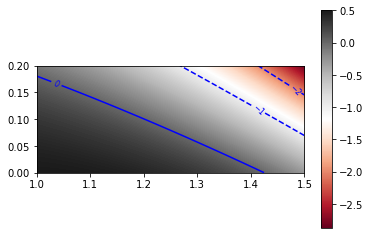

In [3]:
A = np.linspace(1,1.5,500)
C = np.linspace(0,0.2,200)
Z = [[f(a,(a-1)/2,c) for a in A] for c in C]
contours = plt.contour(A, C, Z, 3, colors='blue')  
plt.clabel(contours, inline=True, fontsize=8) 
plt.imshow(Z, extent=[1, 1.5, 0, 0.2], origin='lower',  
           cmap='RdGy')  
plt.colorbar() 


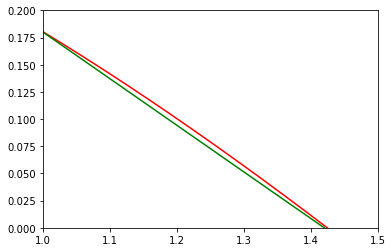

In [31]:
A = np.linspace(1,1.5,500)
C = np.array([fsolve(lambda x:f(a,(a-1)/2,x), x0= 0) for a in A]).reshape((-1,))
plt.plot(A,C,'r')
plt.ylim(0, 0.2)
plt.xlim(1,1.5)
plt.plot(A,(1.42-A)*3/7, 'g')

In [38]:
A = np.linspace(1,1.42,420)
B = (A-1)/2
C = (1.42-A)/7*3
y = np.array([f(A[i], B[i], C[i]) for i in range(420)])
y.min()


0.0015589611582236262

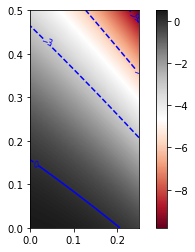

In [124]:
a = 1.5
C = np.linspace(0,0.5,500)
B = np.linspace(0,(a-1)/2, 500)
Z = [[f(a,b,c) for b in B] for c in C]
contours = plt.contour(B, C, Z, 3, colors='blue')  
plt.clabel(contours, inline=True, fontsize=8) 
plt.imshow(Z, extent=[0, (a-1)/2, 0, 0.5], origin='lower',  
        cmap='RdGy')  
plt.colorbar() 

In [4]:
C = np.linspace(0.001,0.2,200)
B = np.linspace(0.001,0.3,300)
def solve(b, c):
    left = f(2*b+1,b,c)
    right = f(10,b,c)

    if(left*right<0):
        return brentq(lambda x:f(x,b,c), a=2*b+1, b=10)
    elif left < 0:
        return -1
    else:
        return 10
Z = np.array([[solve(b,c) for b in B] for c in C])

<Figure size 432x288 with 0 Axes>

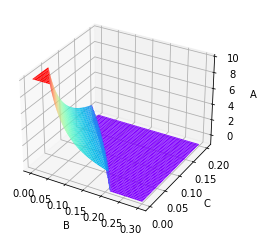

In [5]:
X, Y = np.meshgrid(B, C)
fig = plt.figure()  
fig = plt.figure()  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,Z,cmap='rainbow') 
ax3.set_xlabel('B')  
ax3.set_ylabel('C')  
ax3.set_zlabel('A')
ax3.view_init(30, -60)  